# **Machine Learning Semester Project**


1.   Muhammad Abdullah Khalid (401168)
2.   Rana Muhammad Saad (400363)
3.   Asadullah Zafar (402646)



In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import AveragePooling2D
from keras import regularizers
from keras import losses

Importng the relevant file names

In [ ]:
import os
from os import listdir
filename = []
# get the path/directory
folder_dir = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/office_0003_out"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        filename.append(images)
print(len(filename))

100


In [ ]:
import os
from os import listdir
# get the path/directory
folder_dir = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/bedroom_0081_out"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        filename.append(images)
print(len(filename))

171


In [ ]:
import os
from os import listdir
# get the path/directory
folder_dir = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/living_room_0006_out"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        filename.append(images)
print(len(filename))

210


In [ ]:
import os
from os import listdir
# get the path/directory
folder_dir = "/content/drive/MyDrive/ML_DATA/Project data/nyu/nyu_office_0_out"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        filename.append(images)
print(len(filename))

825


In [ ]:
import os
from os import listdir
# get the path/directory
folder_dir = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/bedroom_0080_out"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        filename.append(images)
print(len(filename))

926


In [ ]:
i = 0
# get the path/directory
folder_dir = "/content/drive/MyDrive/Copy of ML_DATA/Project data/virtual11/virtual"
for images in os.listdir(folder_dir):
  i = i+1
    # check if the image ends with png
  if (images.endswith(".png")):
      filename.append(images)
  if(i > 1000):
    break
print(len(filename))

1927


Importing the images

In [ ]:
images = np.array([])
for file in filename[0:101]:
  path = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/office_0003_out/" + file
  image = cv2.imread(path)
  images = np.append(images, image[::2, ::2, 1])
for file in filename[101:172]:
  path = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/bedroom_0081_out/" + file
  image = cv2.imread(path)
  images = np.append(images, image[::2, ::2, 1])
for file in filename[172:210]:
  path = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/living_room_0006_out/" + file
  image = cv2.imread(path)
  images = np.append(images, image[::2, ::2, 1])
for file in filename[211:826]:
  path = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/nyu_office_0_out/" + file
  image = cv2.imread(path)
  images = np.append(images, image[::2, ::2, 1])
for file in filename[826:926]:
  path = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/bedroom_0080_out/" + file
  image = cv2.imread(path)
  images = np.append(images, image[::2, ::2, 1])
for file in filename[927:1500]:
  path = "/content/drive/MyDrive/Copy of ML_DATA/Project data/virtual11/virtual/" + file
  image = cv2.imread(path)
  images = np.append(images, image[::2, ::2, 1])

In [ ]:
for file in filename[1222:1500]:
  path = "/content/drive/MyDrive/Copy of ML_DATA/Project data/virtual11/virtual/" + file
  image = cv2.imread(path)
  images = np.append(images, image[:, :, 1])

Shaping the Images to our desired size

In [ ]:
images = np.reshape(images, (-1, 240, 320))

In [ ]:
print(images.shape)

(1498, 240, 320)


Adding the Labels in one-hot notation

In [ ]:
labels = np.zeros((1799, 2))
labels[0:926] = [1, 0]
labels[926:1500] = [0, 1]

Random Shuffling the Images

In [ ]:
def shuffle(a, b):
  x = np.random.permutation(1498)
  return a[x], b[x]
images, labels = shuffle(images,labels)

Feature Normalization

In [ ]:
u = images.mean(0).reshape((1,)+images.shape[1:])
o = np.maximum(images.std(0).reshape((1,)+images.shape[1:]), 1e-10)
images = (images - u)/o

In [ ]:
images_train = images[0:1300]

Creating the Convolutional Neural Network Model

In [ ]:
input_shape = (240, 320)
model = Sequential()
model.add(Conv2D(5, (20, 20), activation="relu"))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(5, (20, 20), activation="relu"))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(5, (20, 20), activation="relu"))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2, activation = "softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.fit(images_train.reshape(-1, 240, 320, 1), labels, batch_size=64, epochs=8, validation_split=0.3)

Epoch 1/8
15/15 [==============================] - 363s 24s/step - loss: 0.3399 - acc: 0.7734 - val_loss: 0.2472 - val_acc: 1.0000
Epoch 2/8
15/15 [==============================] - 364s 24s/step - loss: 0.2695 - acc: 0.9956 - val_loss: 0.2416 - val_acc: 1.0000
Epoch 3/8
15/15 [==============================] - 360s 24s/step - loss: 0.2623 - acc: 0.9956 - val_loss: 0.2349 - val_acc: 1.0000
Epoch 4/8
15/15 [==============================] - 359s 24s/step - loss: 0.2546 - acc: 0.9956 - val_loss: 0.2283 - val_acc: 1.0000
Epoch 5/8
15/15 [==============================] - 350s 23s/step - loss: 0.2471 - acc: 0.9956 - val_loss: 0.2211 - val_acc: 1.0000
Epoch 6/8
15/15 [==============================] - 352s 23s/step - loss: 0.2394 - acc: 0.9956 - val_loss: 0.2138 - val_acc: 1.0000
Epoch 7/8
15/15 [==============================] - 346s 23s/step - loss: 0.2315 - acc: 0.9956 - val_loss: 0.2059 - val_acc: 1.0000
Epoch 8/8
15/15 [==============================] - 342s 23s/step - loss: 0.2230 - a

In [ ]:
model.save_weights('model.h5')

In [ ]:
images_dict = {'Data': images}

In [ ]:
from scipy.io import savemat
savemat('Data4.mat', images_dict)

In [ ]:
from scipy.io import loadmat
Data = loadmat('/content/drive/MyDrive/Data4.mat')

In [ ]:
images = Data['Data']

In [ ]:
def RealOrFake(image):
  j = model.predict(image.reshape(1, 480, 640, 1))
  if(j[0,0] > j[0,1]):
    print('Fake Depth')
  else:
    print('Real Depth')

1/1 [==============================] - 1s 653ms/step
Fake Depth


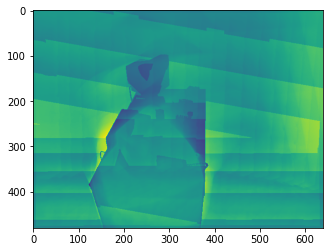

In [ ]:
import matplotlib.pyplot as plt
RealOrFake(images[172])
plt.imshow(images[172])